In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats as stats
from pandas import Series, DataFrame
import pandas as pd
from IPython.display import display, HTML
plt.rc('figure', figsize=(10, 6))
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df=pd.read_csv('ClothingStore.csv')

## Introduction

Explore and analyse the data of a retail clothing store chain. The <tt>ClothingStore</tt> data set represents actual data provided by a clothing store chain in New England.<BR>
This data mining task is a classification problem. We are to classify which customers will respond to a direct-mail marketing promotion, based on information collected about the customers.<BR>
To become more familiar with the data set tools like: EDA, graphical and descriptive statistical methods for learning about data are used.

## Getting a feel for the data set

In [4]:
df.RESP.value_counts().sort_index()/len(df.RESP)

0    0.834647
1    0.165353
Name: RESP, dtype: float64

The target variable will be <font color='blue'>RESP</font>. As can be seen above, the overall proportion of responders to the direct-mail marketing promotion is 16.54%.

One of the variable, <font color='blue'>CLUSTYPE</font>, contains the market segmentation category for each customer as defined by Nielsen Claritas.

- (a) Generate a table that contains the top 5 cluster type with the highest frequencies (so most prevalent lifestyle cluster type).
- (b) Match the cluster type in the file *Lifestyle.htm* and report the labels. 
- (c) Give a description of the clientele which the highest response rate in terms of income and education.

Here is an example of the first row of the table generated by 1(b):

|Count|Nr|Label|Characteristics|
|------|------|
|3488|10|Home Sweet Home|These households are typically married couples...|

In [5]:
lifestyle = pd.read_html('Lifestyle.htm')

- **Generate a table that contains the top 5 cluster type with the highest frequencies (so most prevalent lifestyle cluster type).**

In [6]:
clusters_by_value = df.CLUSTYPE.value_counts().sort_index()/len(df.CLUSTYPE)
clusters_by_value.nlargest(5)

10    0.121115
1     0.094309
4     0.079308
16    0.065731
8     0.049655
Name: CLUSTYPE, dtype: float64

- **Match the cluster type in the file Lifestyle.htm and report the labels. Hint: use pd.read_html('Lifestyle.htm') to load the htm-file**

In [7]:
labels = pd.read_html('Lifestyle.htm')[0]
#Create new dataframe with cluster_type unique values (sorted by index)
dd = pd.DataFrame(np.sort(df.CLUSTYPE.unique()), index = range(0,len(df.CLUSTYPE.unique())), columns=['Nr']) 
#Insert new column with frequency per cluster type (sorted by index)
dd.insert(0, 'Count', df.CLUSTYPE.value_counts().sort_index())
#Merge new dataframe with lifestyle dataframe on cluster type
dd = pd.merge(dd, labels, on='Nr')
#Sort dataframe by frequency
dd = dd.sort_values(by='Count', ascending=False)
#Print new dataframe
pd.set_option('display.max_colwidth', -1)
HTML(dd.to_html())


,Count,Nr,Label,Characteristics
9,3488,10,Home Sweet Home,"These households are typically married couples with one or no children at home. They have an above average household income, own their home and are primarily concentrated in the suburbs."
0,2716,1,Upper Crust,"These are families with older children located in the suburbs. They have very high levels of income and education and work in executive, managerial and other professional occupations."
3,2284,4,Mid-Life Success,"These are households with very high incomes living in suburban areas. They are homeowners with very high property values, primarily working in white-collar occupations such as sales."
15,1893,16,Country Home Families,"These are typically married families with children, located in rural areas. They have a household income very near the national average, own their home and work in blue-collar occupations"
7,1430,8,Movers and Shakers,"These are typically households containing singles and couples, with two workers and no children. They live in the suburbs and some urban areas and have high levels of education and income."
14,1327,15,Great Beginnings,"These are typically households with one or two young adults, living in renter-occupied housing and located in urban and suburban areas. Their household income is slightly higher than average, as is the percent that have college degrees and white-collar occupations."
10,1301,11,Family Ties,"These households are generally families with children, living in suburban areas in the west. They have a medium-high level of income, have attended some college and live in houses built between 1960 and 1979."
17,1224,18,White Picket Fence,"These are typically suburban families with one or two children. They have household incomes around the national average, live in owner-occupied housing and work in blue-collar occupations."
4,1219,5,Prosperous Metro Mix,"These are typically married couples with young children, living in suburban and urban areas. They have high income and education levels, are homeowners and work in white-collar occupations."
22,1158,23,Settled In,"These are primarily older couples, with no children in the household, or single person households. They live in suburban areas, have medium levels of income and education and a high likelihood of being retired."


- **Give a description of the clientele which the highest response rate in terms of income and education.**

#### Solution 1: Considering RESPONSERATE variable with 100% response <br> 

From the output we observe that some of the people have medium-low level of income and less than average level of education,<br>
whereas some people have medium-high level of income and education. 

In [8]:
labels = pd.read_html('Lifestyle.htm', header=0)[0]
labels_data = labels[['Nr', 'Characteristics']]
data = df[['RESPONSERATE', 'CLUSTYPE']]
data = data.sort_values(by=['RESPONSERATE', 'CLUSTYPE'], ascending=False)
data = data.drop(data[data.CLUSTYPE == 0].index)
data = data.loc[data['RESPONSERATE'] == 100.0]
data['Nr'] = data.CLUSTYPE
data = pd.merge(data, labels_data, on='Nr')
data = data.drop_duplicates(keep='first')
data = data.drop('Nr', 1)
result = data[['Characteristics']]
pd.set_option('display.max_colwidth', -1)
HTML(result.to_html())

,Characteristics
0,"The small number of ZIP+4s included in this segment are unclassified due to a lack of residential data. As a result, these areas are similar to Segment 49 in their lack of homogeneity."
11,"This segment contains primarily young adults and seniors, renting in urban areas. They are single occupant households with few children and live in structures with over 50 units. They have a very low level of income and a less than average level of education."
12,"These are primarily families with a relatively large number of children. They have very low income and education levels, and are mostly renters and work in the service sector and other blue-collar occupations."
15,"These households are typically young singles, renting in urban areas. They have relatively few children, a low level of income, lower than average education and many employed in service positions."
18,"These are rural households with a large number of children. They are primarily homeowners, with very low incomes, little education, working in blue-collar occupations."
21,"These are urban households, with relatively young adults and a large number of children. They are typically renters, with very low income, little education, working as laborers, machine operators and in other blue-collar occupations."
22,"This segment typically consists of younger, single adults with young children, and seniors, located in urban and suburban areas. They are typically renters, with very low income and education, working in blue- collar occupations."
27,"These are typically young adults and seniors, living in renter-occupied households, located in urban and suburban areas. These households typically contain one to two persons, have a low level of income and work in white-collar specialty and blue-collar service occupations."
34,"These are primarily rural households, containing married, middle aged adults, with older children. They have little education beyond high school, low income and work in blue-collar occupations."
58,"Typically young singles, living in non-family households, located in urban areas. Primarily renters with medium-low income, little college education, working in administrative support and service occupations."


#### Solution 2 : Considering RESP variable 

From the results we notice that married couples with high levels of education and income have the highest response rate

In [9]:
#Calculate resp frequency per cluster type 
frq = []
for elem in dd.Nr:
    frq.append(df.loc[df['CLUSTYPE'] == elem, 'RESP'].sum())

#Insert new column with resp frequency per cluster type 
dd['Response'] = frq
#Sort dataframe by frequency
dd = dd.sort_values(by='Response', ascending=False)
#Display top 5 clientele with the highest response rate
dd[:5]

,Count,Nr,Label,Characteristics,Response
9,3488,10,Home Sweet Home,"These households are typically married couples with one or no children at home. They have an above average household income, own their home and are primarily concentrated in the suburbs.",588
0,2716,1,Upper Crust,"These are families with older children located in the suburbs. They have very high levels of income and education and work in executive, managerial and other professional occupations.",443
3,2284,4,Mid-Life Success,"These are households with very high incomes living in suburban areas. They are homeowners with very high property values, primarily working in white-collar occupations such as sales.",354
15,1893,16,Country Home Families,"These are typically married families with children, located in rural areas. They have a household income very near the national average, own their home and work in blue-collar occupations",308
7,1430,8,Movers and Shakers,"These are typically households containing singles and couples, with two workers and no children. They live in the suburbs and some urban areas and have high levels of education and income.",248


## Analyse abnormalities

For many of the amounts-spent fields and the proportions-spent fields, some of the customers have negative values for the amount or proportion of money spent. How can this be? Now, the data were collected within a particular time period, which is unspecified, perhaps a month or a quarter. It is possible for a customer to have bought some clothing in a prior period, and returned the purchased clothing in the time period from which the data are collected. If this customer also did not make any major purchases during the time period of interest, then the net sales for this customer would be negative.
- (a) For the variable <font color='blue'>PSSPEND</font> (amount spend at the PS franchise), determine the number customers with a negative amount spent.
- (b) Generate a flag variable that recodes <font color='blue'>PSSPEND</font> in 'Neg','Pos' and 'Zero'.
- (c) Using this flag variable generate a crosstab showing the response *rate* for the three spending  categories 'Neg','Pos' and 'Zero'.
- (d) In the remainder of this assignment, we consider the absolute value of spending observations. Motivate why this is a reasonable choice given the results of 2(c).

- For the variable PSSPEND (amount spend at the PS franchise), determine the number customers with a negative amount spent.

There are 102 number of customers with negative values for the variable PSSPEND

In [10]:
# Solution 1 :
sum(n < 0 for n in df.PSSPEND.values.flatten())

# Solution 2 :
len(df[df.PSSPEND<0])

102

102

- Generate a flag variable that recodes PSSPEND in 'Neg','Pos' and 'Zero'

In [11]:
# Remove records with containing NaN  or empty values
df = df.dropna(subset=['PSSPEND'])

#Flag variable that recodes PSSPEND in 'Neg','Pos' and 'Zero'
df['PSSPEND_TYPE'] = ["Pos" if elem > 0 else ("Neg" if elem < 0 else "Zero") for elem in df.PSSPEND]

# Create 3 dummy variables: 'Pos', 'Neg', 'Zero'
df['PSSPEND_POS'] = [1 if elem > 0 else 0 for elem in df.PSSPEND]
df['PSSPEND_NEG'] = [1 if elem < 0 else 0 for elem in df.PSSPEND]
df['PSSPEND_ZERO'] = [1 if elem == 0 else 0 for elem in df.PSSPEND]

# Display the relevant columns
df[['RESP','PSSPEND','PSSPEND_TYPE', 'PSSPEND_POS', 'PSSPEND_NEG', 'PSSPEND_ZERO']]

,RESP,PSSPEND,PSSPEND_TYPE,PSSPEND_POS,PSSPEND_NEG,PSSPEND_ZERO
0,0,0.00,Zero,0,0,1
1,1,0.00,Zero,0,0,1
2,0,0.00,Zero,0,0,1
3,0,0.00,Zero,0,0,1
4,0,0.00,Zero,0,0,1
5,0,58.00,Pos,1,0,0
6,0,0.00,Zero,0,0,1
7,1,0.00,Zero,0,0,1
8,0,0.00,Zero,0,0,1
9,0,0.00,Zero,0,0,1


- Using this flag variable generate a crosstab showing the response rate for the three spending categories 'Neg','Pos' and 'Zero'

In [12]:
# Generate a crosstab calculating the response rate 
crosstab_response_rate = df.groupby('PSSPEND_TYPE')['RESP']

# Display the response rate for the three spending categories 'Neg','Pos' and 'Zero'
# expressed in percentage
(crosstab_response_rate.sum()/crosstab_response_rate.count()*100)

PSSPEND_TYPE
Neg     21.568627
Pos     22.194318
Zero    11.983704
Name: RESP, dtype: float64

- In the remainder of this file, we consider the absolute value of spending observations. Motivate why this is a reasonable choice given the results of 2(c).

#### Explanation
- According to the results of 2(c) there are 21 percent customers (22 out of 102 customers) responded to the measured direct-mail marketing promotion 
with negative amount spent.They have purchased some clothing in a prior period, and returned the purchased clothing in the time period from which the data are collected and made no major purchases during the time period of interest)
<br>
The column PSSPEND records the amount spend at the PS franchise, The value can be negative, if the customer did not make major purchases and also returned the purchased clothing of the prior period in the time period of interest.<br>
Because the customer responded to the campaign but did not make any major purchases in this time period (so that the amount spent to become positive), we count s/he as a valid participant to the campaign. <br>
For these customers we consider the absolute value of spending observations.</font>
<br>
Scenarios per time frame : <br>
    - Zero : brougth and returned <br>
    - Neg : brougth it in the past and returned it in this time frame <br>
    - Poz : brougth it now <br>


### Transformations to Achieve Normality or Symmetry

Most of the numeric fields are right-skewed. For example, the column <font color='blue'>HI</font> contains a variable which takes large values for customers who purchase only a few different classes of clothes (e.g., blouses, legwear, pants), and small values for customers who purchase many different classes of clothes (hence giving an indication of the product uniformity).
- (a) Generate a histogram of <font color='blue'>HI</font> using 50 bins. Do you see some spikes? Is there a pattern?

Many data mining methods and models function best when the variables are normally distributed, or,
at least when they are symmetric. The analyst may choose transformations such as the natural log (<tt>np.log</tt>) transformation or the square root transformation (<tt>np.sqrt</tt>).
- (b) Transform <font color='blue'>HI</font> in <font color='blue'>HI_log</font> using the log transformation and generate again a histogram. Compare the skewness of <font color='blue'>HI</font> and <font color='blue'>HI_log</font> using the <tt>DataFrame</tt>.**skew** method.
- (c) The column <font color='blue'>PBLOUSES</font> contains information about the percentage spent on blouses. This could be negative, so first define <font color='blue'>PBLOUSES_abs</font> as the absolute value of <font color='blue'>PBLOUSES</font>. Which transformation do you suggest to achieve more symmetry: the log of square root transformation? Motivate your answer.

- Generate a histogram of HI using 50 bins. Do you see some spikes? Is there a pattern?

- As per the histogram below, the distribution is right-skewed, with spikes at bins : 50.5, 99.5, 150.5, 199.5 <br>
Yes, There is a pattern in the spikes. Spikes - buying few clothes - being regularly present each 50 </font>

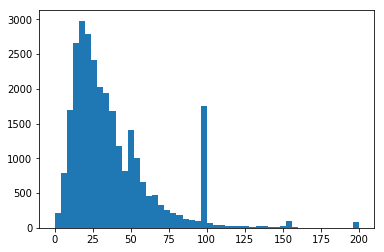

In [13]:
 plt.hist(df.HI, bins=50, histtype = 'bar');

-  Transform HI in HI_log using the log transformation and generate again a histogram. Compare the skewness of HI and HI_log using the DataFrame.skew method.

- The skewness of variable HI is +1.76, which means it is positively or right skewed. The distribution is highly skewed as the value of skewness is greater than +1.
<br>
The skewness of HI_log is -0.29, which means it is negatively or left skewed. As the skewness is between −0.5 and +0.5, the distribution is approximately symmetric.


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 3.000e+00,
        3.000e+00, 7.000e+00, 1.100e+01, 1.100e+01, 2.000e+01, 2.200e+01,
        4.400e+01, 5.500e+01, 7.700e+01, 1.120e+02, 1.800e+02, 2.540e+02,
        3.730e+02, 5.540e+02, 8.940e+02, 1.301e+03, 1.859e+03, 2.244e+03,
        2.515e+03, 2.567e+03, 2.539e+03, 2.784e+03, 2.105e+03, 2.265e+03,
        1.758e+03, 1.065e+03, 6.280e+02, 2.038e+03, 1.550e+02, 1.200e+02,
        1.390e+02, 8.700e+01]),
 array([-2.99573227, -2.82985128, -2.66397029, -2.4980893 , -2.3322083 ,
        -2.16632731, -2.00044632, -1.83456532, -1.66868433, -1.50280334,
        -1.33692235, -1.17104135, -1.00516036, -0.83927937, -0.67339837,
        -0.50751738, -0.34163639, -0.1757554 , -0.0098744 ,  0.15600659,
         0.32188758,  0.48776858,  0.65364957,  0.81953056,  0.98541155,
         1.

Skew of HI = 1.760117
Skew of HI_log = -0.299685


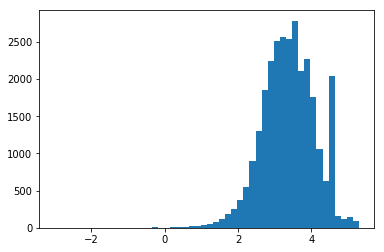

In [14]:
# Log Transformation
df['HI_log'] = np.log(df.HI)

# Generate a histogram
plt.hist(df.HI_log, bins=50);

# Compare the skewness of HI and HI_log using the DataFrame.skew method
print('Skew of HI = %f' %df['HI'].skew())
print('Skew of HI_log = %f' %df['HI_log'].skew())

- The column PBLOUSES contains information about the percentage spent on blouses. This could be negative, so first define PBLOUSES_abs as the absolute value of PBLOUSES. Which transformation do you suggest to achieve more symmetry: the log of square root transformation? Motivate your answer.

- Skew of PBLOUSES_abs is 2.44 <br>
Skew of PBLOUSES_abs_log is -0.98 <br>
Skew of PBLOUSES_abs_sqrt is 0.94 <br>
<br>Both the sqrt() and log() transforms have reduced the skewness of the column PBLOUSES (absolute values). <br>
As the skewness values are not in between +0.5 and -0.5, it is still not normally distributed, but there is some level of symmetry. 
<br>
I would choose log transformation due to more symmetry than square root transformation.

(array([  7.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.50000000e+01,   5.00000000e+01,
          8.47000000e+02,   5.70200000e+03,   8.34900000e+03,
          1.96900000e+03]),
 array([-12.02375109, -10.82137598,  -9.61900087,  -8.41662576,
         -7.21425065,  -6.01187554,  -4.80950044,  -3.60712533,
         -2.40475022,  -1.20237511,   0.        ]),
 <a list of 10 Patch objects>)

(array([  424.,  1952.,  4248.,  4525.,  2972.,  1509.,   727.,   334.,
          119.,   132.]),
 array([ 0.00244949,  0.10220454,  0.20195959,  0.30171464,  0.40146969,
         0.50122474,  0.6009798 ,  0.70073485,  0.8004899 ,  0.90024495,  1.        ]),
 <a list of 10 Patch objects>)

Skew of PBLOUSES_abs = 2.443047
Skew of PBLOUSES_abs_log = -0.984717
Skew of PBLOUSES_abs_sqrt = 0.946873
Kurtosis of PBLOUSES_abs_log = 5.668252
Kurtosis of PBLOUSES_abs_sqrt = 1.478014


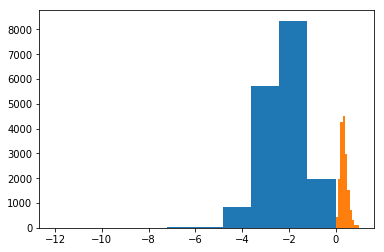

In [73]:
df.dropna(subset=['PBLOUSES'], how='all', inplace = True)

PBLOUSES_abs = []
for x in df.PBLOUSES:
    if x!=0:
        PBLOUSES_abs.append(np.abs(x))        
        
#Transform PBLOUSES_abs in PBLOUSES_log using the log transformation 
PBLOUSES_log = list(map(lambda x: math.log(x), PBLOUSES_abs))

#Transform PBLOUSES_abs in PBLOUSES_sqrt using the sqrt transformation 
PBLOUSES_sqrt = list(map(lambda x: math.sqrt(x), PBLOUSES_abs))

df_PBLOUSES = pd.DataFrame(
    {'PBLOUSES_abs': PBLOUSES_abs,
     'PBLOUSES_log': PBLOUSES_log,
     'PBLOUSES_sqrt': PBLOUSES_sqrt,
    })

#Generate a histogram
plt.hist(df_PBLOUSES.PBLOUSES_log)
plt.hist(df_PBLOUSES.PBLOUSES_sqrt)

print('Skew of PBLOUSES_abs = %f' %df_PBLOUSES['PBLOUSES_abs'].skew())
print('Skew of PBLOUSES_abs_log = %f' %df_PBLOUSES['PBLOUSES_log'].skew())
print('Skew of PBLOUSES_abs_sqrt = %f' %df_PBLOUSES['PBLOUSES_sqrt'].skew())

print('Kurtosis of PBLOUSES_abs_log = %f' %df_PBLOUSES['PBLOUSES_log'].kurtosis())
print('Kurtosis of PBLOUSES_abs_sqrt = %f' %df_PBLOUSES['PBLOUSES_sqrt'].kurtosis())

## Exploring the relationship between the predictors and the response

We would like to investigate the variable-by-variable association between the predictors and the target variable, response to the marketing promotion.
Below your can find transformations of the following variables:

- <font color='blue'>FRE</font>: the number of purchase visits
- <font color='blue'>PBLOUSES</font>: the percentage spent on blouses
- <font color='blue'>HI</font>: index about product uniformity

Based on the nonnormalized and normalized histograms (you may use the code below and change the ``varname``), describe for each of the above transformed variables the relationship with the target variable.

In [74]:
df['FRE_log_z']=stats.zscore(np.log(df.FRE), ddof=1)
df['PBLOUSES_abs_sqrt_z']=stats.zscore(np.sqrt(np.abs(df.PBLOUSES)), ddof=1)
df['HI_log_z']=stats.zscore(np.log(df.HI), ddof=1)

In [75]:
def generate_hist(varname):
    x0=df[varname][df.RESP==0]
    x1=df[varname][df.RESP==1]
    count0, bin_limits = np.histogram(x0,bins=30)
    count1, _          = np.histogram(x1,bins=bin_limits)
    plt.hist(x0,bins=bin_limits,color='LightBlue');
    plt.hist(x1,bins=bin_limits,color='DarkRed');
    ### normalized overlay histogram
    count_tot=count0+count1
    with np.errstate(divide='ignore',invalid='ignore'):
        count0rel=np.where(count_tot==0,np.nan,count0/(count0+count1))
        count1rel=np.where(count_tot==0,np.nan,count1/(count0+count1))
    labels=np.round((bin_limits[1:]+bin_limits[:-1])/2,1)    # determine middle of classes
    DataFrame({'0':count0rel,'1':count1rel},index=labels)[['1','0']].plot.bar(stacked=True,color=('DarkRed','LightBlue'));  

- For variable FRE_log_z : The response rate increases with increase in the number of purchase visits and Responses decreases while decreasing the number of (purchased) visits. There is a positive correlation between responses (RESP) and nb of visits (FRE Logarithm Transformation):


Correlation between RESP and FRE_log_z:  0.398746914533


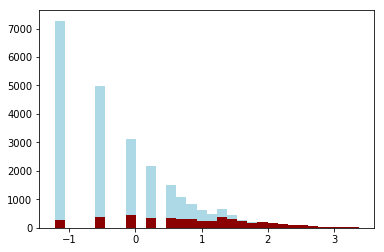

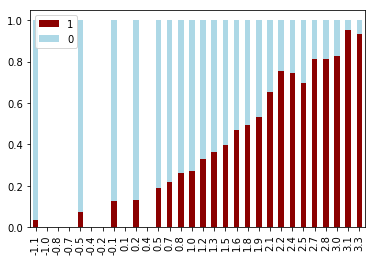

In [76]:
generate_hist('FRE_log_z') 
print ("Correlation between RESP and FRE_log_z: ", df.RESP.corr(df.FRE_log_z))

- For variable PBLOUSES_abs_sqrt_z : Responses slightly increase with higher percentages spent on blouses and Responses slightly decrease with smaller percentages spent on blouses - the numeber of respondends grows together with the percentages spent on blouses. There is a positive correlation between responses (RESP) and percentages spent on blouses (PBLOUSES Square Root Transformation):


Correlation between RESP and PBLOUSES_abs_sqrt_z:  0.0578098149701


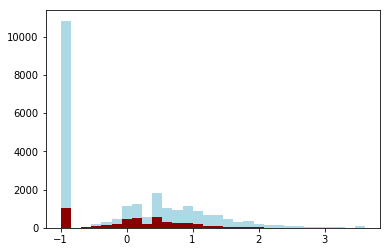

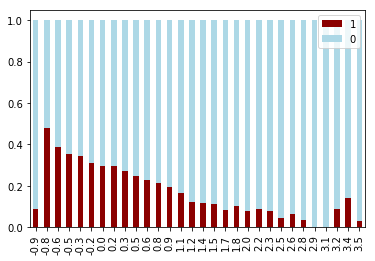

In [77]:
generate_hist('PBLOUSES_abs_sqrt_z') 
print ("Correlation between RESP and PBLOUSES_abs_sqrt_z: ", df.RESP.corr(df.PBLOUSES_abs_sqrt_z))

- For variable HI_log_z : With increase in the value of product uniformity index the response decreases:<br>
-- Responses increase if customers buy more classes of cloths (smaller values for HI) <br>
-- Responses decrease if customers buy few classes of cloths (higher values for HI)
<br>There is a negative correlation between responses (RESP) and the product uniformity (HI Logarithm Transformation):


Correlation between RESP and HI Log Transformation:  -0.291958166044


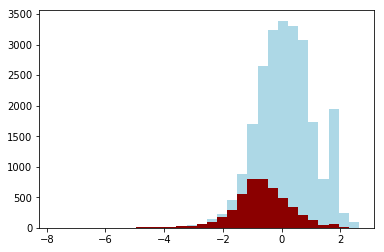

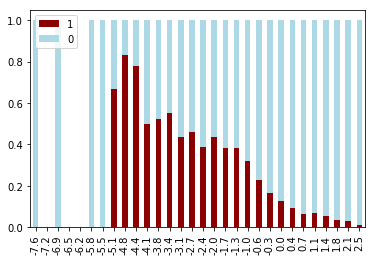

In [78]:
generate_hist('HI_log_z')
print ("Correlation between RESP and HI Log Transformation: ", df.RESP.corr(df.HI_log_z))


Next, we would like to investigate the relationship with indicator variables and the response rate. 
Consider the flag variables:

- <font color='blue'>WEB</font>: equals 1 for those who have made purchases via the company’s web shopping option
- <font color='blue'>CC_CARD</font>: equals 1 for credit card holder

Please, answer the following three questions:
- (a) Using normalized bar chart with the *response* overlay, describe for each of the above variables the relationship with the target variable.
- (b) Using crosstabs determine how many times Web buyers are more likely to respond to those have not made a purchase via the Web. Repeat for credit card holders versus noncredit card holders.
- (c) Using <tt>stats.chi2_contingency()</tt> test if the relationship between <font color='blue'>WEB</font> and <font color='blue'>RESP</font> is significant at a 5% nominal significance level. State hypotheses, observed test statistic, p-value, decision and conclusion.

Using normalized bar chart with the response overlay, describe for each of the above variables the relationship with the target variable.

- For those customers, who have made purchases via the company’s web shopping option have given more response than those customers who haven't purchased through web shopping option. There is a positive correlation between the number of responses and the online shoppers.


In [79]:
def generate_barchart(varname):
    x0=df[varname][df.RESP==0]
    x1=df[varname][df.RESP==1]
    count0, bin_limits = np.histogram(x0,bins=30)
    count1, _          = np.histogram(x1,bins=bin_limits)
    ### normalized overlay histogram
    count_tot=count0+count1
    with np.errstate(divide='ignore',invalid='ignore'):
        count0rel=np.where(count_tot==0,np.nan,count0/(count0+count1))
        count1rel=np.where(count_tot==0,np.nan,count1/(count0+count1))
    labels=np.round((bin_limits[1:]+bin_limits[:-1])/2,1)    # determine middle of classes
    DataFrame({'0':count0rel,'1':count1rel},index=labels)[['1','0']].plot.bar(stacked=True,color=('DarkRed','LightBlue'));  
    
def generate_barchart_for_binary_data(varname):
    x0=df[varname][df.RESP==0]
    x1=df[varname][df.RESP==1]
    count0, bin_limits = np.histogram(x0,bins=2)
    count1, _          = np.histogram(x1,bins=bin_limits)
    ### normalized overlay histogram
    count_tot=count0+count1
    with np.errstate(divide='ignore',invalid='ignore'):
        count0rel=np.where(count_tot==0,np.nan,count0/(count0+count1))
        count1rel=np.where(count_tot==0,np.nan,count1/(count0+count1))
    #labels=np.round((bin_limits[1:]+bin_limits[:-1])/2,1)    # determine middle of classes
    #DataFrame({'0':count0rel,'1':count1rel},index=labels)[['1','0']].plot.bar(stacked=True,color=('DarkRed','LightBlue'));  
    DataFrame({'0':count0rel,'1':count1rel})[['1','0']].plot.bar(stacked=True,color=('DarkRed','LightBlue'));  
    

Correlation between RESP and WEB Square Root Transformation:  0.319640851666


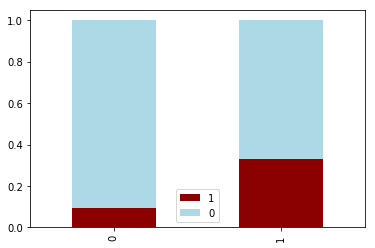

In [80]:
df['WEB_abs_sqrt_z']=stats.zscore(np.sqrt(np.abs(df.RESPONSERATE)), ddof=1)
generate_barchart_for_binary_data('WEB_abs_sqrt_z')
print ("Correlation between RESP and WEB Square Root Transformation: ", df.RESP.corr(df.WEB_abs_sqrt_z))

- The customers who hold a credit card have given more response than those customers who don't hold credit card. Positive correlation between the number of responses and the credit card holders. </font>

Correlation between RESP and CC_CARD Square Root Transformation:  0.244568241194


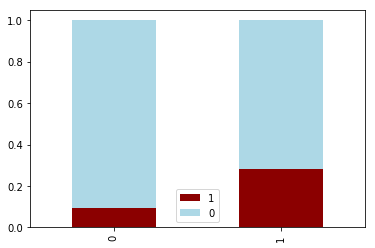

In [81]:
df['CC_CARD_abs_sqrt_z']=stats.zscore(np.sqrt(np.abs(df.CC_CARD)), ddof=1)
generate_barchart_for_binary_data('CC_CARD_abs_sqrt_z')  
print ("Correlation between RESP and CC_CARD Square Root Transformation: ", df.RESP.corr(df.CC_CARD_abs_sqrt_z))

Using crosstabs determine how many times Web buyers are more likely to respond to those have not made a purchase via the Web. Repeat for credit card holders versus non-credit card holders.

- 562 buyers or 1.95% of the web buyers are likely to respond. <br>
- 4200 buyers or 14.58% of the non-web buyers are likely to respond. <br>
- 3096 buyers or 10.75% credit card holders are likely to respond. <br>
- 1666  buyers or 5.78% of non-credit card holders are likely to respond. 

In [82]:
# Generate a crosstab calculating the response rate 
df.groupby(['WEB','RESP']).size()
crosstab_WEB_percentage = df.groupby(['WEB','RESP']).size().transform(lambda x: round(((x/x.sum())*100),2))
df.groupby(['CC_CARD','RESP']).size()
crosstab_CC_CARD_percentage = df.groupby(['CC_CARD','RESP']).size().transform(lambda x: round(((x/x.sum())*100),2))

WEB  RESP
0    0       23346
     1       4200 
1    0       691  
     1       562  
dtype: int64

CC_CARD  RESP
0        0       16102
         1       1666 
1        0       7935 
         1       3096 
dtype: int64

Using stats.chi2_contingency() test if the relationship between WEB and RESP is significant at a 5% nominal significance level. State hypotheses, observed test statistic, p-value, decision and conclusion.

- #### <font color=blue>  Hypothesis : <br>
    H0 (Null Hypothesis) : WEB and RESP are independent from each other <br>
    H1 (Alternate Hypothesis) : WEB and RESP are not independent  </font>   

- #### <font color=blue> Analysis : Is it Significant ? <br>
    If p-value ≤ 0.05 then H0 is not statistically significant, we reject H0 <br>
    As p-value(1.00) > 0.05, so we donot reject the H0. There is no sufficient evidence against H0 at 5% significance level.</font>
- #### <font color=blue> Conclusion : <br>
    The test result shows that there is no strong evidence to reject the null hypothesis that WEB and RESP are independent at 5% significance level. Therefore WEB and RESP are independent at 5% significance level
</font>  

In [83]:
chi2, p, dof, expected = stats.chi2_contingency(crosstab_WEB_percentage)
print("chi-square value = %f" %chi2)
print("p-value = %f" %p)
print("degrees of freedom = %f" %dof)
print("Expected :")
print (expected)

chi-square value = 0.000000
p-value = 1.000000
degrees of freedom = 0.000000
Expected :
[ 81.07  14.58   2.4    1.95]
